In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_boston
# http://maruo51.com/2019/04/22/corr-matrix/

drop_list=["id", "year", "Country", "City", "month", "day", "temperature_cnt",
           "humidity_cnt", "ws_cnt", "dew_cnt", "pressure_cnt"]

drop_list2=["humidity_max", "humidity_min", "temperature_min", "temperature_max",
           "humidity_min", "humidity_max", "humidity_mid", "pressure_min", "pressure_max", "pressure_mid",
            "ws_min", "ws_max", "ws_mid", "dew_min", "dew_max", "dew_mid"]
target_name = 'pm25_mid'
df = pd.read_csv('/Users/hagi/downloads/place/train.csv')
df = df.drop(drop_list, axis=1)
df.head()


,Country,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,...,pressure_var,ws_min,ws_mid,ws_max,ws_var,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,Australia,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,...,89.588,0.241,1.088,3.101,1.983,7.671,10.358,15.112,13.424,19.901
1,Australia,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,...,7.320,0.828,3.473,7.396,10.411,21.324,23.813,24.221,2.021,13.741
2,Australia,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,...,4655.348,0.000,2.107,8.089,15.719,10.309,13.133,15.422,6.355,25.918
3,Australia,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,...,10.898,0.284,0.503,3.592,2.485,7.146,10.685,13.344,9.417,174.370
4,Australia,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,...,15.142,0.500,0.755,3.396,1.937,1.091,3.277,12.272,4.109,167.063


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df =pd.DataFrame(df_scaled,columns=df.columns)
df.head()

ValueError: could not convert string to float: 'Australia'

In [ ]:
df["co_ran"]=df["co_max"]-df["co_min"]
df["o3_ran"]=df["o3_max"]-df["o3_min"]
df["so2_ran"]=df["so2_max"]-df["so2_min"]
df["no2_ran"]=df["no2_max"]-df["no2_min"]
df["temperature_ran"]=df["temperature_max"]-df["temperature_min"]
df["pressure_ran"]=df["pressure_max"]-df["pressure_min"]
df["humidity_ran"]=df["humidity_max"]-df["humidity_min"]
df["fst_dir"]=df["co_var"]+df["so2_var"]+df["no2_var"]
df = df.drop(drop_list2, axis=1)

In [ ]:
corr_matrix = df.corr()
corr_y = pd.DataFrame({"features":df.columns,"corr_y":corr_matrix[target_name]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

<AxesSubplot:xlabel='Country', ylabel='pm25_mid'>

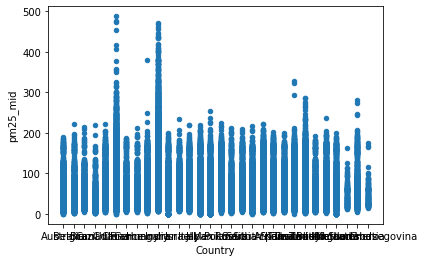

In [8]:
df.plot.scatter(x='Country', y=target_name)

In [ ]:
# plot cor
#sns.pairplot(df)
#corr_matrix = df.corr()
#print(corr_matrix)